In [2]:
import pandas as pd
df = pd.read_csv('PRAPARE Report.csv')
print(df.columns.tolist())

['Client ID', 'Last Name', 'First Name', 'Location Name', 'Are you Hispanic or Latino?', 'Which race are you? ', 'Migrant Work?', 'Armed Forces?', 'Language', 'Family Members', 'Housing', 'HousingWorry', 'Address', 'Education', 'Work', 'Insurance', 'Income', 'Needs', 'Talk', 'Stress', 'Refugee', 'Safe', 'Partner', 'Transport', 'Total Score']


In [3]:
# for our purpose, we only extract data in following columns
# 'Family Members' + 'Talk': people who have family members and are open to communication tend to bear less pressure
# 'HousingWorry' + 'Work' + 'Income': stress and sense of safety can vary based on these categories often 
df = df[['Family Members', 'HousingWorry', 'Work', 'Income', 'Talk', 'Stress', 'Safe']]
df.head()

,Family Members,HousingWorry,Work,Income,Talk,Stress,Safe
0,1,No,Unemployed and seeking work,"Less than $24,999",3 to 5 times a week,A little bit,Unsure
1,0,No,Part-time or Temporary Work,"$25,000 - $49,999",Less than once a week,Somewhat,No
2,1,No,Otherwise Unemployed but not seeking work ( EX...,"Less than $24,999",Less than once a week,A little bit,No
3,1,No,Otherwise Unemployed but not seeking work ( EX...,"Less than $24,999",3 to 5 times a week,Quite a bit,Yes
4,1,No,Otherwise Unemployed but not seeking work ( EX...,"Less than $24,999",1 or 2 times a week,Not at all,Yes


In [4]:
# convert all data to numbers for later use, standard of issues may change
# set the datas with serious issues to obtain value 1

def housingworry(x):
    result = []
    for element in x:
        if 'Yes' in element:
            result.append(1)
        elif 'No' in element:
            result.append(0)
        else:
            result.append(0.5)
    return result

def work(x):
    result = []
    for element in x:
        if 'Unemployed' in element:
            result.append(1)
        elif 'choose' in element:
            result.append(0.5)
        else:
            result.append(0)
    return result

def talk(x):
    result = []
    for element in x:
        if 'Less' in element or '1' in element:
            result.append(1)
        elif 'choose' in element:
            result.append(0.5)
        else:
            result.append(0)
    return result

def family(x):
    result = []
    for element in x:
        if str(element) == '':
            result.append(1)
        elif 'self' in str(element):
            result.append(1)
        elif 'Self' in str(element):
            result.append(1)
        elif '0' in str(element) or '1' in str(element):
            result.append(1)
        else:
            result.append(0)

    return result



df['HousingWorry_num'] = housingworry(df['HousingWorry'])
df['Work_num'] = work(df['Work'])
df['Income_num'] = df['Income'].apply(lambda x: 1 if 'Less' in x else 0)
df['Talk_num'] = talk(df['Talk'])
df['Stress_num'] = df['Stress'].apply(lambda x: 1 if 'Quite' in x or 'Very' in x else 0)
df['Safe_num'] = df['Safe'].apply(lambda x: 0 if 'Yes' in x else 1)
df['family_num'] = family(df['Family Members'])
df = df.drop(['Family Members', 'HousingWorry', 'Work', 'Income', 'Talk', 'Stress', 'Safe'], axis=1)
df

,HousingWorry_num,Work_num,Income_num,Talk_num,Stress_num,Safe_num,family_num
0,0.0,1.0,1,0.0,0,1,1
1,0.0,0.0,0,1.0,0,1,1
2,0.0,1.0,1,1.0,0,1,1
3,0.0,1.0,1,0.0,1,0,1
4,0.0,1.0,1,1.0,0,0,1
...,...,...,...,...,...,...,...
716,0.0,1.0,1,0.0,1,1,1
717,0.0,1.0,1,0.0,0,0,1
718,0.0,1.0,1,1.0,1,1,1
719,0.0,1.0,0,1.0,1,0,1


In [5]:
# plot
import matplotlib.pyplot as plt
df_safe = df.where(df['Safe_num']==1)
df_safe = df_safe.dropna()
print(len(df_safe))

df_stress = df.where(df['Stress_num']==1)
df_stress = df_stress.dropna()
print(len(df_stress))


219
136


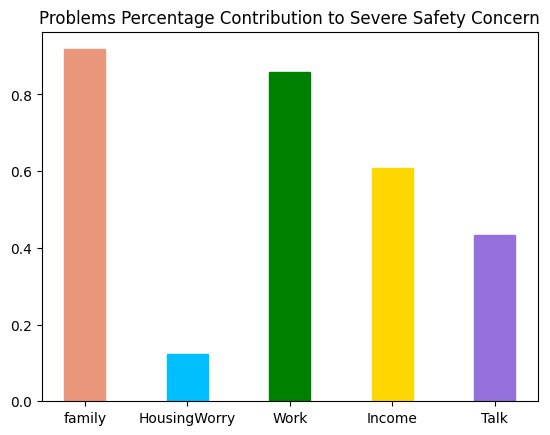

In [6]:
# plot the corresponding issues percentage that's under safety concerns 
total_n = len(df_safe)
y1 = sum(df_safe['family_num']==1)/total_n
y2 = sum(df_safe['HousingWorry_num']==1)/total_n
y3 = sum(df_safe['Work_num']==1)/total_n
y4 = sum(df_safe['Income_num']==1)/total_n
y5 = sum(df_safe['Talk_num']==1)/total_n
y_safe = [y1, y2, y3, y4, y5]
x = list(range(5))
barlist = plt.bar(x, y_safe, width = 0.4)
barlist[0].set_color('darksalmon')
barlist[1].set_color('deepskyblue')
barlist[2].set_color('g')
barlist[3].set_color('gold')
barlist[4].set_color('mediumpurple')
plt.title('Problems Percentage Contribution to Severe Safety Concern')
plt.xticks(x, ['family', 'HousingWorry', 'Work', 'Income', 'Talk'])
plt.show()

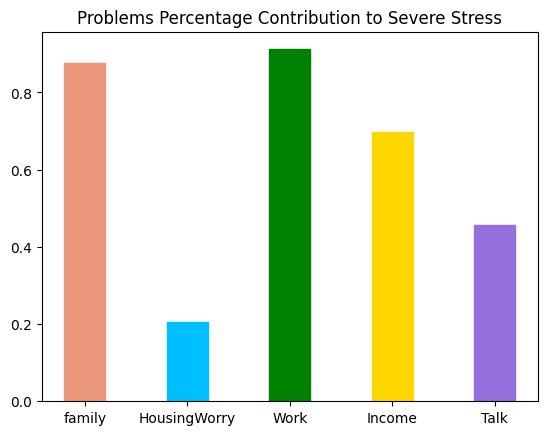

In [187]:
# plot the corresponding issues percentage that's under stress concerns 
total_n = len(df_stress)
y1 = sum(df_stress['family_num']==1)/total_n
y2 = sum(df_stress['HousingWorry_num']==1)/total_n
y3 = sum(df_stress['Work_num']==1)/total_n
y4 = sum(df_stress['Income_num']==1)/total_n
y5 = sum(df_stress['Talk_num']==1)/total_n
y_stress = [y1, y2, y3, y4, y5]
x = list(range(5))
barlist = plt.bar(x, y_stress, width = 0.4)
barlist[0].set_color('darksalmon')
barlist[1].set_color('deepskyblue')
barlist[2].set_color('g')
barlist[3].set_color('gold')
barlist[4].set_color('mediumpurple')

plt.title('Problems Percentage Contribution to Severe Stress')
plt.xticks(x, ['family', 'HousingWorry', 'Work', 'Income', 'Talk'])
plt.show()